# Settings and Imports

In [ ]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
from keras import layers
import opendatasets as od
import random 
from pathlib import Path
from random import choice
import fnmatch
import os
import shutil
from PIL import Image
import PIL
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Model Test 1

In [ ]:
input_img = keras.Input(shape=(128, 128, 3), batch_size=20)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x) #64
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x) #32
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x) #16
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x) #8


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x) #16
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #32
x = layers.Conv2D(16, (3, 3), activation='relu' , padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #64
x = layers.Conv2D(16, (3, 3), activation='relu' , padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #128
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(20, 128, 128, 3)]       0         
                                                                 
 conv2d (Conv2D)             (20, 128, 128, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (20, 64, 64, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (20, 64, 64, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (20, 32, 32, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (20, 32, 32, 8)           584   

## Data

In [ ]:
od.download("https://www.kaggle.com/datasets/pavansanagapati/images-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chrismontasser
Your Kaggle Key: ··········


100%|██████████| 1.01G/1.01G [00:35<00:00, 30.9MB/s]


In [ ]:
def random_files(num, name, start, saved_file_name): 
  file_names = []
  path: Path = Path(name)
  count = len(fnmatch.filter(os.listdir(name), '*.*'))
  if(num>count):
    num = count
  while True: 
    random_image = choice(list(path.iterdir())).name
    if random_image not in file_names: 
        file_names.append(random_image) 
        if len(file_names) == num: 
            break
  for i in range(len(file_names)):
    image = Image.open(name+ '/'+file_names[i])
    resized = image.resize((256 , 256))
    resized.save(name+ '/'+file_names[i])
    shutil.copyfile(name+ '/'+file_names[i], '/content/'+str(saved_file_name)+ '/'+str(i+start)+ '.'+ file_names[i].split('.')[-1])


def add_noise(inputs, noise_factor=0.3):
    # print(inputs.shape)
    # x, y, z=inputs[0].shape
    mean = 0
    var = 0.01
    sigma = np.sqrt(var)
    n = np.random.normal(loc=mean, 
                        scale=sigma, 
                        size=inputs.shape)
    return inputs+n

In [ ]:
path: Path = Path('/content/images-dataset/data')
data_folder=list(path.iterdir())
# random_files(100, str(data_folder[0]), 0)
random_files(100, str(data_folder[1]), 100, 'Data')
random_files(100, str(data_folder[2]), 200, 'Data')
random_files(100, str(data_folder[3]), 0, 'Data')

In [ ]:
X =[]
for image in os.listdir("/content/Data/"):
  #load it 
  X.append(np.array(PIL.Image.open("/content/Data/" + image).convert('RGB')))
  

In [ ]:
x_train, x_test=train_test_split(X, train_size=0.8, test_size=0.2)

x_train = np.array(x_train).astype('float32') / 255.
x_test = np.array(x_test).astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 256, 256, 3))
x_test = np.reshape(x_test, (len(x_test), 256, 256, 3))

In [ ]:
x_train_noised = add_noise(x_train)
x_test_noised = add_noise(x_test)

## Fitting


In [ ]:
autoencoder.fit(x_train_noised, x_train_noised,
                epochs=300,
                batch_size=20,
                shuffle=True,
                )
decoded_imgs = autoencoder.predict(x_test_noised)


Epoch 1/300
12/12 [==============================] - 0s 21ms/step - loss: 0.0271
Epoch 2/300
12/12 [==============================] - 0s 15ms/step - loss: 0.0272
Epoch 3/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0273
Epoch 4/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0276
Epoch 5/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0274
Epoch 6/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0271
Epoch 7/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0270
Epoch 8/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0270
Epoch 9/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0270
Epoch 10/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 11/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0269
Epoch 12/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0269
Epoch 13/300
12/12 [=====

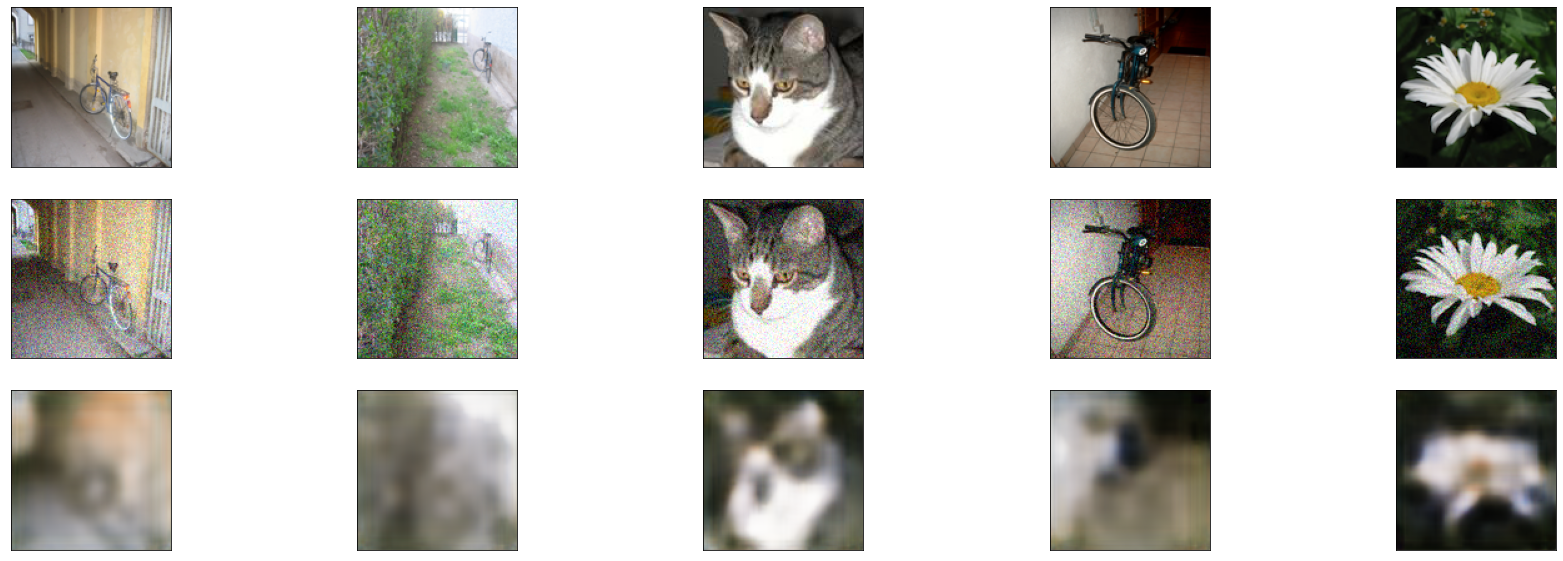

In [ ]:
import matplotlib.pyplot as plt
n = 5
plt.figure(figsize=(30, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noised[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i+(2*n))
    plt.imshow(decoded_imgs[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Test Five images

1/1 [==============================] - 0s 198ms/step


(5, 128, 128, 3)


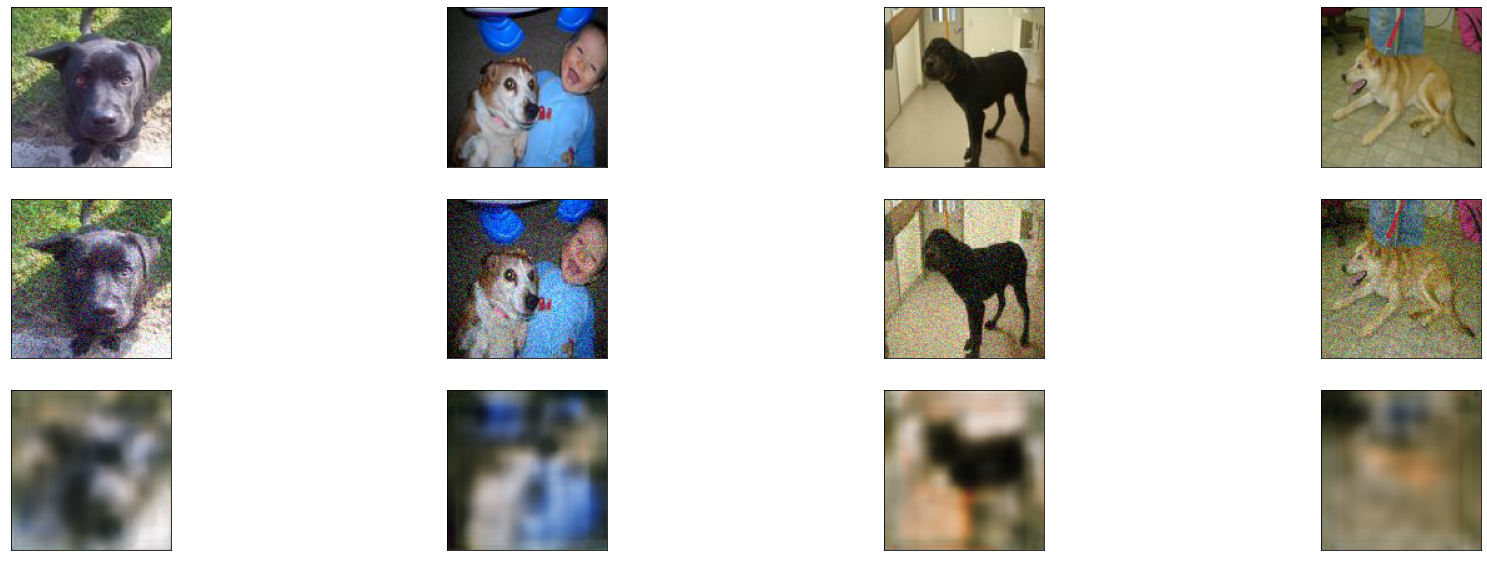

In [ ]:
path: Path = Path('/content/images-dataset/data')
data_folder=list(path.iterdir())

random_files(5, str(data_folder[6]), 0, 'Test')

X_test =[]
for image in os.listdir("/content/Test/"):
  #load it 
  if(image=='.ipynb_checkpoints'):
    continue
  X_test.append(np.array(PIL.Image.open("/content/Test/" + image).convert('RGB')))
  

X_test = np.array(X_test).astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test), 128, 128, 3))

X_test_noised = add_noise(X_test)

decoded_imgs_test = autoencoder.predict(X_test_noised)
print(X_test.shape)
n = 4
plt.figure(figsize=(30, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(X_test[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + n)
    plt.imshow(X_test_noised[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i+(2*n))
    plt.imshow(decoded_imgs_test[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

encoder = keras.Model(input_img, encoded)


encoded_imgs = encoder.predict(x_test)


2/2 [==============================] - 0s 6ms/step


Add noise to the encoded vector 


In [ ]:
encoded_imgs_noised = add_noise(encoded_imgs)

In [ ]:
#Decoder
encoded_input = keras.Input(shape=(8, 8, 3), batch_size=10)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x) # 16
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) # 32
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) # 64
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #128
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.compile(optimizer='adam', loss='mse')
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(10, 8, 8, 3)]           0         
                                                                 
 conv2d_9 (Conv2D)           (10, 8, 8, 8)             224       
                                                                 
 up_sampling2d_4 (UpSampling  (10, 16, 16, 8)          0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (10, 16, 16, 8)           584       
                                                                 
 up_sampling2d_5 (UpSampling  (10, 32, 32, 8)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (10, 32, 32, 16)          1168

In [ ]:
#Decoder takes the model weights
k = 0
for i in range (8,16):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

decoded_imgs_noised = decoder.predict(encoded_imgs_noised)

2/2 [==============================] - 0s 6ms/step


In [ ]:
decoded_imgs_noised.shape

(60, 128, 128, 3)

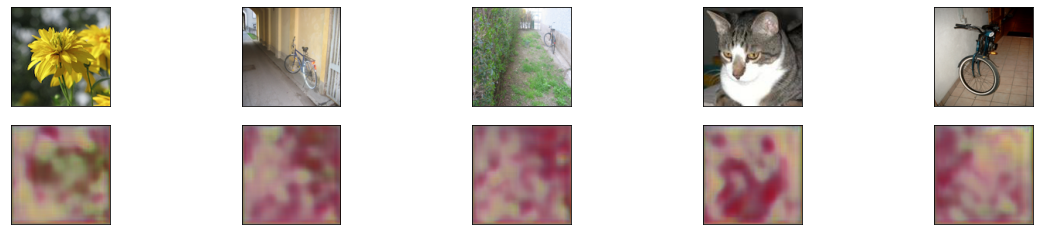

In [ ]:
import matplotlib.pyplot as plt

n = 5 # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noised[i].reshape(128, 128, 
    3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Model Test 2

In [ ]:
input_img = keras.Input(shape=(256, 256, 3), batch_size=30)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x) #256
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x) #64
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x) #32
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x) 


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x) #32
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #64
x = layers.Conv2D(16, (3, 3), activation='relu' , padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #128
# x = layers.Conv2D(16, (3, 3), activation='relu' , padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x) #256
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_2 = keras.Model(input_img, decoded)
autoencoder_2.compile(optimizer='adam', loss='mse')
autoencoder_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(30, 256, 256, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (30, 256, 256, 16)        448       
                                                                 
 max_pooling2d_7 (MaxPooling  (30, 128, 128, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (30, 128, 128, 8)         1160      
                                                                 
 max_pooling2d_8 (MaxPooling  (30, 64, 64, 8)          0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (30, 64, 64, 3)           219 

In [ ]:
autoencoder_2.fit(x_train_noised, x_train_noised,
                epochs=200,
                batch_size=30,
                shuffle=True,
                validation_data=(x_test_noised, x_test_noised))
decoded_imgs = autoencoder_2.predict(x_test_noised)

Epoch 1/200
8/8 [==============================] - 2s 129ms/step - loss: 0.0843 - val_loss: 0.0781
Epoch 2/200
8/8 [==============================] - 1s 84ms/step - loss: 0.0745 - val_loss: 0.0592
Epoch 3/200
8/8 [==============================] - 1s 81ms/step - loss: 0.0584 - val_loss: 0.0430
Epoch 4/200
8/8 [==============================] - 1s 93ms/step - loss: 0.0472 - val_loss: 0.0372
Epoch 5/200
8/8 [==============================] - 1s 93ms/step - loss: 0.0419 - val_loss: 0.0343
Epoch 6/200
8/8 [==============================] - 1s 82ms/step - loss: 0.0364 - val_loss: 0.0293
Epoch 7/200
8/8 [==============================] - 1s 82ms/step - loss: 0.0316 - val_loss: 0.0267
Epoch 8/200
8/8 [==============================] - 1s 83ms/step - loss: 0.0296 - val_loss: 0.0255
Epoch 9/200
8/8 [==============================] - 1s 81ms/step - loss: 0.0279 - val_loss: 0.0257
Epoch 10/200
8/8 [==============================] - 1s 93ms/step - loss: 0.0271 - val_loss: 0.0243
Epoch 11/200
8/8 [

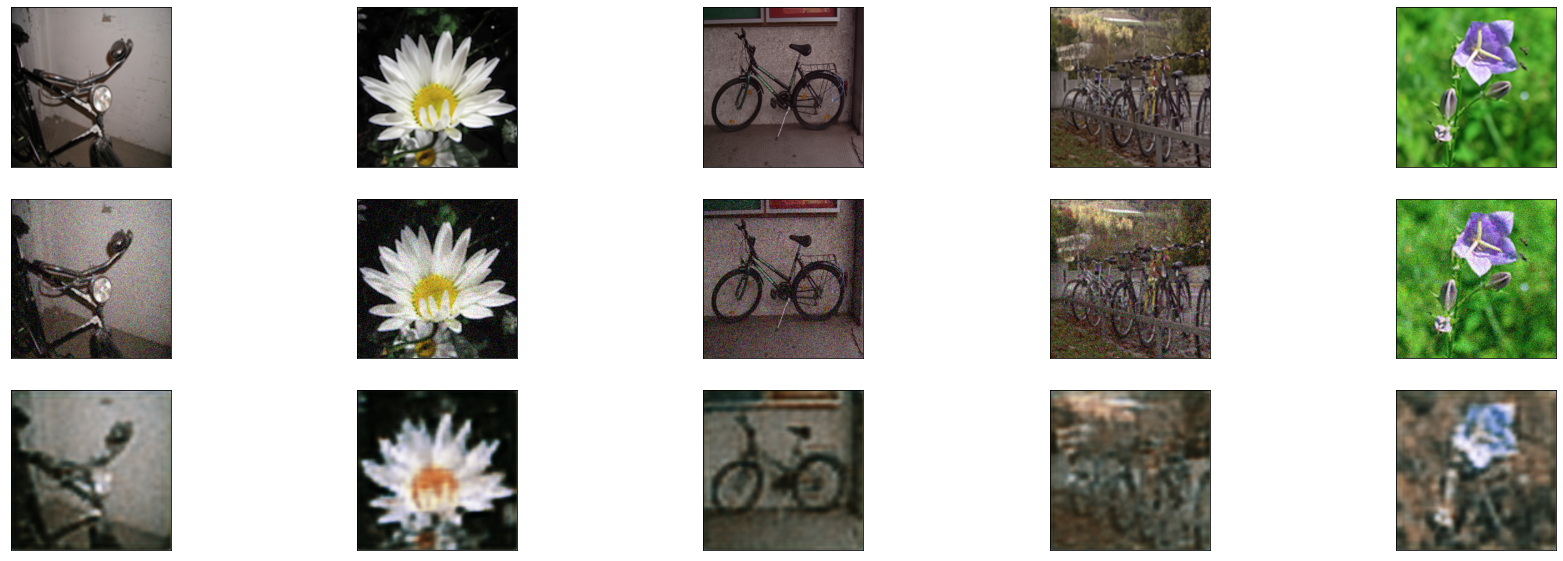

In [ ]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(30, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noised[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i+(2*n))
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 134ms/step


(5, 256, 256, 3)


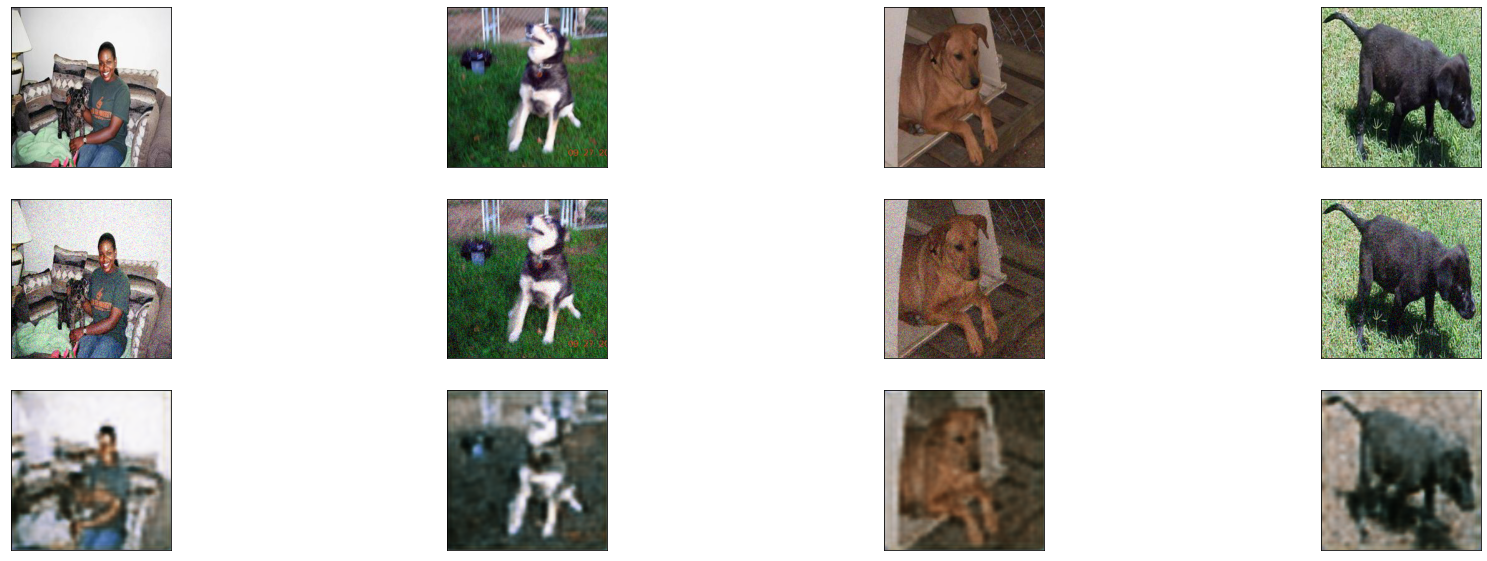

In [ ]:
path: Path = Path('/content/images-dataset/data')
data_folder=list(path.iterdir())

random_files(5, str(data_folder[6]), 0, 'Test')

X_test =[]
for image in os.listdir("/content/Test/"):
  #load it 
  if(image=='.ipynb_checkpoints'):
    continue
  X_test.append(np.array(PIL.Image.open("/content/Test/" + image).convert('RGB')))
  

X_test = np.array(X_test).astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test), 256, 256, 3))

X_test_noised = add_noise(X_test)

decoded_imgs_test = autoencoder_2.predict(X_test_noised)
print(X_test.shape)
n = 4
plt.figure(figsize=(30, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(X_test[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + n)
    plt.imshow(X_test_noised[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i+(2*n))
    plt.imshow(decoded_imgs_test[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Decoder
encoded_input = keras.Input(shape=(32, 32, 3), batch_size=10)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x) # 64
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) # 128
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) # 256
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder_2 = keras.Model(encoded_input, last)
decoder_2.compile(optimizer='adam', loss='mse')
decoder_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(10, 32, 32, 3)]         0         
                                                                 
 conv2d_32 (Conv2D)          (10, 32, 32, 8)           224       
                                                                 
 up_sampling2d_17 (UpSamplin  (10, 64, 64, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (10, 64, 64, 8)           584       
                                                                 
 up_sampling2d_18 (UpSamplin  (10, 128, 128, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (10, 128, 128, 16)        1168

In [ ]:

encoder = keras.Model(input_img, encoded)


encoded_imgs = encoder.predict(X_test)
encoded_imgs_noised = add_noise(encoded_imgs)

1/1 [==============================] - 0s 84ms/step


In [ ]:
#Decoder takes the model weights
k = 0
for i in range (6,14):
    decoder_2.weights[k].assign(autoencoder_2.weights[i])
    k = k+1

decoded_2_imgs_noised = decoder_2.predict(encoded_imgs_noised)

1/1 [==============================] - 0s 15ms/step


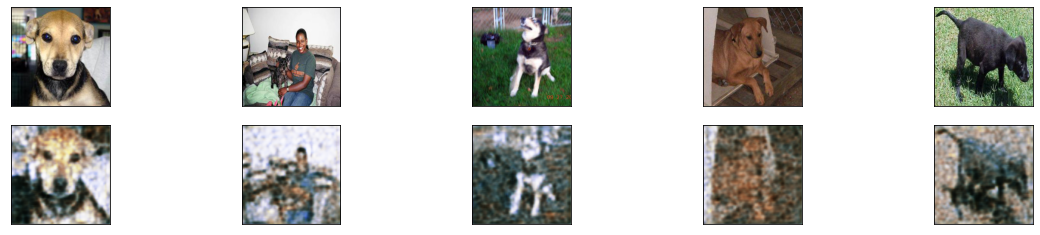

In [ ]:
import matplotlib.pyplot as plt

n = 5 # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_2_imgs_noised[i].reshape(256, 256, 
    3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
